# Task 1: Data Prepping

## 1.1 - Loading the data 

- **_[TO DO]_**: Load the climate data from LAB1 (5 Danish cities between 1980-2018), and store them into Pandas data frames.
- **_[TO DO]_**: Have a quick overview of the downloaded dataset and make sure to understand the variables contained in the dataframe. Pay particular attention to the DateTime. 

**[HINT]:** In this case, the index of the dataframe is not an integer (i.e., 0, 1, 2,...) as seen in the previous lab. But we have a multiple index (MultiIndex) [pandas.DataFrame.xs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.xs.html). Check the website to see how select the data of the desidered city.
    


In [1]:
import wbdata as wb
import datetime
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#@title Functions to download data 
########################################################################
#
# This file is a partially modified version of one of the TensorFlow Tutorials available at:
#
# https://github.com/Hvass-Labs/TensorFlow-Tutorials
#
# Published under the MIT License. See the file LICENSE for details.
#
# Copyright 2018 by Magnus Erik Hvass Pedersen
#
########################################################################

import sys
import os
import urllib.request
import tarfile
import zipfile


def _print_download_progress(count, block_size, total_size):
    """
    Function used for printing the download progress.
    Used as a call-back function in maybe_download_and_extract().
    """

    # Percentage completion.
    pct_complete = float(count * block_size) / total_size

    # Limit it because rounding errors may cause it to exceed 100%.
    pct_complete = min(1.0, pct_complete)

    # Status-message. Note the \r which means the line should overwrite itself.
    msg = "\r- Download progress: {0:.1%}".format(pct_complete)

    # Print it.
    sys.stdout.write(msg)
    sys.stdout.flush()


def download(base_url, filename, download_dir):
    """
    Download the given file if it does not already exist in the download_dir.
    :param base_url: The internet URL without the filename.
    :param filename: The filename that will be added to the base_url.
    :param download_dir: Local directory for storing the file.
    """

    # Path for local file.
    save_path = os.path.join(download_dir, filename)

    # Check if the file already exists, otherwise we need to download it now.
    if not os.path.exists(save_path):
        # Check if the download directory exists, otherwise create it.
        if not os.path.exists(download_dir):
            os.makedirs(download_dir)

        print("Downloading", filename, "...")

        # Download the file from the internet.
        url = base_url + filename
        file_path, _ = urllib.request.urlretrieve(url=url,
                                                  filename=save_path,
                                                  reporthook=_print_download_progress)

        print(" Done!")


def download_and_extract(url, download_dir):
    """
    Download and extract the data if it doesn't already exist.
    Assumes the url is a tar-ball file.
    :param url:
        Internet URL for the tar-file to download.
    :param download_dir:
        Directory where the downloaded file is saved.
    """

    # Filename for saving the file downloaded from the internet.
    # Use the filename from the URL and add it to the download_dir.
    filename = url.split('/')[-1]
    file_path = os.path.join(download_dir, filename)

    # Check if the file already exists.
    # If it exists then we assume it has also been extracted,
    # otherwise we need to download and extract it now.
    if not os.path.exists(file_path):
        # Check if the download directory exists, otherwise create it.
        if not os.path.exists(download_dir):
            os.makedirs(download_dir)

        # Download the file from the internet.
        file_path, _ = urllib.request.urlretrieve(url=url,
                                                  filename=file_path,
                                                  reporthook=_print_download_progress)

        print()
        print("Download finished. Extracting files.")

        if file_path.endswith(".zip"):
            # Unpack the zip-file.
            zipfile.ZipFile(file=file_path, mode="r").extractall(download_dir)
        elif file_path.endswith((".tar.gz", ".tgz")):
            # Unpack the tar-ball.
            tarfile.open(name=file_path, mode="r:gz").extractall(download_dir)

        print("Done.")
    else:
        print("Data has apparently already been downloaded and unpacked.")
        

In [3]:
###########################
# Tasks:
#   Load climate data from LAB1 
#   Quick overview of the dataset:
#       - understand the variables in the dataframe
#       - check the Data time for two cities 
###########################

### TO DO

# Location of the dataset on the internet.
data_url = "https://github.com/Hvass-Labs/weather-denmark/raw/master/weather-denmark.tar.gz"

# Local directory where you want to download and save the dataset.
data_dir = "weather-data/"

download_and_extract(url=data_url, download_dir=data_dir)

def load_original_data():
    return pd.read_pickle('./weather-data/weather-denmark.pkl')

df = load_original_data()
df
#########

Data has apparently already been downloaded and unpacked.


Temp  Pressure  WindSpeed  WindDir
City     DateTime                                               
Aalborg  1980-03-01 00:00:00   5.0    1008.1       11.3    290.0
         1980-03-01 00:20:00   4.0       NaN        9.2    270.0
         1980-03-01 00:50:00   4.0       NaN        9.2    280.0
         1980-03-01 01:20:00   4.0       NaN        9.2    280.0
         1980-03-01 01:50:00   4.0       NaN        8.7    270.0
...                            ...       ...        ...      ...
Roskilde 2018-03-01 22:20:00  -5.0       NaN        5.1     70.0
         2018-03-01 22:50:00  -5.0       NaN        4.1     70.0
         2018-03-01 23:00:00  -5.3    1018.6        4.1     60.0
         2018-03-01 23:20:00  -5.0       NaN        3.6     60.0
         2018-03-01 23:50:00  -5.0       NaN        3.6     60.0

[2918150 rows x 4 columns]

## 1.2 - Data interpolation

Many time series analyses assume observations over uniform time intervals. In the real world, incoming data often does not arrive in this way. As a result, one common prerequisite for Time Series analysis is to take an initially raw input and transform it into discrete intervals, or to resample an input at one frequency into an input of a different frequency.

For instance, we plot the temperature data for the cities of Aalborg and Aarhus in the day 1st March 2018 from 00am to 12pm. We can notice that the temperature data for the two cities is not always recorded at the same time.

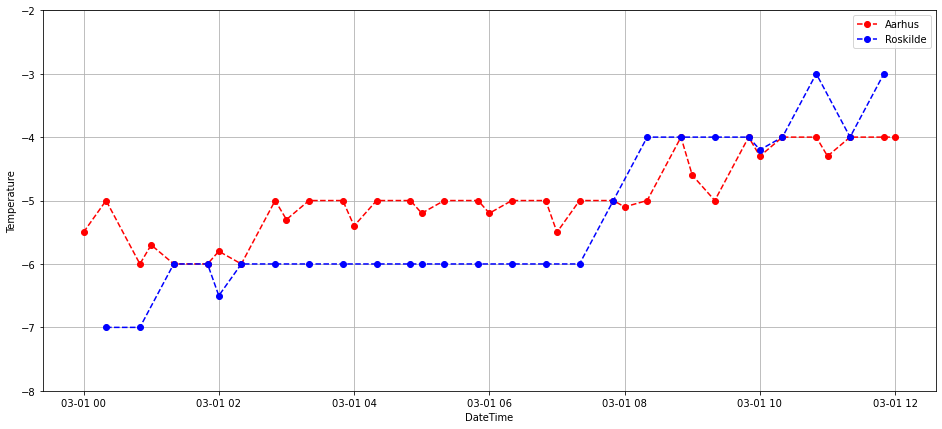

In [4]:
# List of the Danish cities in this data-set.
cities = ['Aalborg', 'Aarhus', 'Esbjerg', 'Odense', 'Roskilde']


city_1 = df.xs(cities[1])
city_2 = df.xs(cities[2])


plt.figure(figsize=(16, 7))
plt.plot(city_1.loc['2018-03-01 00:00:00':'2018-03-01 12:00:00', 'Temp'],
         label='Aarhus', linestyle='--', marker='o',  c='r')

plt.plot(city_2.loc['2018-03-01 00:00:00':'2018-03-01 12:00:00', 'Temp'],
         label='Roskilde', linestyle='--', marker='o',  c='b')

plt.xlabel('DateTime')
plt.ylabel('Temperature')

plt.ylim([-8, -2])
plt.grid()
plt.legend()
plt.show()


As just observed, this dataset contains data recorded with an irregular interval across cities. Therefore, before continuing with the data analysis, we will [resample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) and [interpolate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html) the values in order to have values at a **regular interval** for all the cities and make possible a fair comparison.

In [5]:
def _resample(df):

    # Upsample in order to have data for every minute.
    df_res = df.resample('1T')

    # Interpolate through time
    df_res = df_res.interpolate(method='time')

    # Downsample to a 1-hour basis (60 minutes).
    df_res = df_res.resample('60T')

    df_res = df_res.interpolate()

    # We can remove all empty rows or leave like this for missing values analysis?
#     df_res = df_res.dropna(how='all')

    return df_res


def load_resampled_data():

    # Path for the cache-file with the resampled data.
    path = path_resampled_data_pickle()

    # Check if the cache-file already exists and load it eventually
    if os.path.exists(path):
        df = pd.read_pickle(path)
    else:
        # Otherwise resample the original data and save it in a cache-file.

        # Load the original data.
        df_org = load_original_data()

        # Split the original data into separate DataFrames for each city.
        df_cities = [df_org.xs(city) for city in cities]

        # Resample the data for each city.
        df_resampled = [_resample(df_city) for df_city in df_cities]

        # Join the resampled data into a single data-frame.
        df = pd.concat(df_resampled, keys=cities, axis=1, join='inner')

        # Save the resampled data in a cache-file for quick reloading.
        df.to_pickle(path)

    return df

In [6]:
def path_resampled_data_pickle():
    # return os.path.join(data_dir, "weather-denmark-resampled.pkl")
    return "./weather-denmark-resampled.pkl"

df_resampled = load_resampled_data()
df_resampled

Aalborg                                     Aarhus  \
                         Temp     Pressure  WindSpeed     WindDir   Temp   
DateTime                                                                   
1980-03-01 10:00:00  4.333333  1007.533333  11.266667  286.666667    4.0   
1980-03-01 11:00:00  5.000000  1007.766667  10.200000  280.000000    5.0   
1980-03-01 12:00:00  5.000000  1008.000000  10.300000  290.000000    5.0   
1980-03-01 13:00:00  5.000000  1008.066667   9.700000  290.000000    5.0   
1980-03-01 14:00:00  4.333333  1008.133333  11.100000  283.333333    5.0   
...                       ...          ...        ...         ...    ...   
2018-03-01 19:00:00 -4.400000  1024.200000   7.200000   70.000000   -3.6   
2018-03-01 20:00:00 -4.300000  1023.700000   6.700000   70.000000   -3.9   
2018-03-01 21:00:00 -3.900000  1023.100000   8.800000   80.000000   -3.5   
2018-03-01 22:00:00 -3.800000  1022.900000   7.200000   70.000000   -3.5   
2018-03-01 23:00:00 -4.200000  1022.500000   7.200000   70.000000   -3.4   

                                                     Esbjerg           \
                        Pressure WindSpeed WindDir      Temp Pressure   
DateTime                                                                
1980-03-01 10:00:00  1008.000000      14.9   290.0       NaN      NaN   
1980-03-01 11:00:00  1008.300000      15.4   290.0  6.083333      NaN   
1980-03-01 12:00:00  1008.600000      13.4   280.0  6.583333      NaN   
1980-03-01 13:00:00  1008.433333      15.4   280.0  6.888889      NaN   
1980-03-01 14:00:00  1008.266667      14.9   300.0  6.222222      NaN   
...                          ...       ...     ...       ...      ...   
2018-03-01 19:00:00  1022.700000       8.8    70.0 -5.000000   1022.6   
2018-03-01 20:00:00  1022.200000       8.2    60.0 -4.333333   1022.6   
2018-03-01 21:00:00  1021.700000       8.2    80.0 -5.000000   1022.6   
2018-03-01 22:00:00  1021.200000       8.2    80.0 -5.000000   1022.6   
2018-03-01 23:00:00  1021.000000       7.7    80.0 -5.333333   1022.6   

                                              Odense                          \
                     WindSpeed     WindDir      Temp     Pressure  WindSpeed   
DateTime                                                                       
1980-03-01 10:00:00        NaN         NaN  5.545455  1010.933333  11.663636   
1980-03-01 11:00:00  12.383333  310.000000  6.142857  1011.066667  12.585714   
1980-03-01 12:00:00  12.883333  310.000000  7.000000  1011.200000  11.300000   
1980-03-01 13:00:00  13.244444  309.444444  7.000000  1011.300000  12.118182   
1980-03-01 14:00:00  12.911111  306.111111  6.857143  1011.400000  12.742857   
...                        ...         ...       ...          ...        ...   
2018-03-01 19:00:00   6.366667   70.000000 -4.400000  1020.400000   8.800000   
2018-03-01 20:00:00   6.866667   80.000000 -5.000000  1019.800000   8.200000   
2018-03-01 21:00:00   8.200000   80.000000 -5.200000  1019.200000   7.700000   
2018-03-01 22:00:00   6.366667   66.666667 -5.000000  1018.700000   8.800000   
2018-03-01 23:00:00   6.533333   60.000000 -4.700000  1018.300000   9.300000   

                                 Roskilde                                  
                        WindDir      Temp Pressure  WindSpeed     WindDir  
DateTime                                                                   
1980-03-01 10:00:00  285.454545       NaN      NaN        NaN         NaN  
1980-03-01 11:00:00  290.000000  5.000000      NaN  11.466667  280.000000  
1980-03-01 12:00:00  290.000000  5.000000      NaN  12.466667  280.000000  
1980-03-01 13:00:00  290.000000  5.166667      NaN  13.133333  278.333333  
1980-03-01 14:00:00  290.000000  5.833333      NaN  12.300000  270.000000  
...                         ...       ...      ...        ...         ...  
2018-03-01 19:00:00   60.000000 -4.400000   1020.6   6.200000   60.000000  
2018-03-01 20:00:00   60.000000 -4.600000   1019.9   

**_[TO DO]_:** Check now the previous plot after resampling and interpolation.


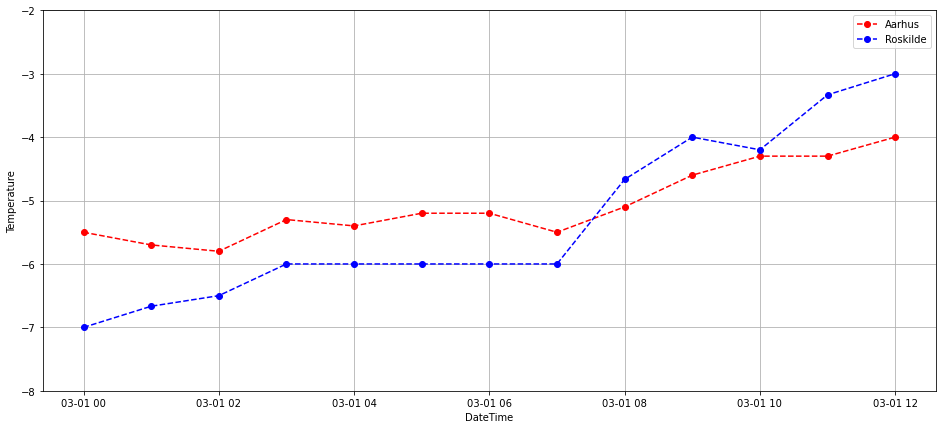

In [7]:
###########################
# Task: 
#   Plot the previous one with the new data
###########################


### TO DO
city_1 = df_resampled['Aarhus']
city_2 = df_resampled['Esbjerg']

plt.figure(figsize=(16, 7))
plt.plot(city_1.loc['2018-03-01 00:00:00':'2018-03-01 12:00:00', 'Temp'],
         label='Aarhus', linestyle='--', marker='o',  c='r')

plt.plot(city_2.loc['2018-03-01 00:00:00':'2018-03-01 12:00:00', 'Temp'],
         label='Roskilde', linestyle='--', marker='o',  c='b')

plt.xlabel('DateTime')
plt.ylabel('Temperature')

plt.ylim([-8, -2])
plt.grid()
plt.legend()
plt.show()

#########

## 1.3 - Data overview

We will now analyse the statistical properties of this dataset. Since this dataset is quite big and contains weather data of almost 40 years, in order try to complete the following instructions:
- **_[TO DO]_**  extract the general statistical properties (mean, variance, min value, max value),
- **_[TO DO]_**  for each city, plot the average temperature and the wind speed variance in January for all the years (1980 to 2018) 
- **_[TO DO]_** the maximum temperature and the minimum wind speed in May 

In [8]:
###########################
# Task: 
#   extract general statistical properties
#
###########################


### TO DO

mean, variance, min_value, max_value = [], [], [], []
for i, column in enumerate(df_resampled.columns.values):
    mean.append(df_resampled.xs(column, axis=1).mean())
    variance.append(df_resampled.xs(column, axis=1).var())
    min_value.append(df_resampled.xs(column, axis=1).min())
    max_value.append(df_resampled.xs(column, axis=1).max())

statistical_prop = pd.DataFrame(data = [mean, variance, min_value, max_value], 
                                index = ['mean', 'variance', 'min_value', 'max_value'], 
                                columns = df_resampled.columns)

statistical_prop

#########

Aalborg                                          Aarhus  \
                Temp     Pressure  WindSpeed      WindDir       Temp   
mean        8.323675  1012.743473   4.867406   192.307074   8.290577   
variance   48.813128   136.660450   7.806108  7756.600951  49.386774   
min_value -25.000000   951.900000   0.000000    10.000000 -24.300000   
max_value  30.800000  1050.800000  32.900000   360.000000  30.900000   

                                                  Esbjerg               \
              Pressure  WindSpeed      WindDir       Temp     Pressure   
mean       1013.352071   4.036376   201.261096   8.537116  1013.131439   
variance    127.181559   6.499463  6751.389633  45.479747   118.912452   
min_value   955.500000   0.000000    10.000000 -27.000000   959.300000   
max_value  1050.000000  33.400000   360.000000  54.000000  1049.300000   

                                      Odense                          \
           WindSpeed      WindDir       Temp     Pressure  WindSpeed   
mean        4.892615   201.758338   8.802755  1013.805596   4.848788   
variance    7.189519  7722.960766  47.951795   120.098419   7.662397   
min_value   0.000000    10.000000 -22.500000   959.700000   0.000000   
max_value  39.100000   360.000000  49.900000  1048.900000  62.521795   

                         Roskilde                                       
               WindDir       Temp     Pressure  WindSpeed      WindDir  
mean        195.840053   8.264180  1012.839357   4.835396   202.708912  
variance   7012.226142  50.759810   137.824113   7.593517  7428.464012  
min_value    10.000000 -21.833333   959.800000   0.000000    10.000000  
max_value   360.000000  32.000000  1048.100000  25.000000   360.000000

       Aalborg    Aarhus   Esbjerg    Odense  Roskilde
1980       NaN       NaN       NaN       NaN       NaN
1981  -0.55953 -0.839382  0.154547 -0.142963 -1.134035
1982 -4.759789 -4.006247 -2.932784 -3.377827 -3.770342
1983  4.183155  4.426639  5.189318  4.632252  4.575424
1984  -0.16328  0.860601  1.447844   1.35371  1.085448
1985 -6.312967 -5.088677 -5.708371 -4.819727 -5.757722
1986 -2.445078 -1.596796 -1.786167  -0.63841 -1.283654
1987 -5.420111 -4.486817 -4.155602 -4.183815 -5.927611
1988  3.035492  3.774875  3.927012   3.85439  3.431395
1989  5.234909  5.169125  5.240935  5.323215  4.103356
1990  3.925664  4.134474  4.599978  4.638262  3.654609
1991  1.230959  2.426397  2.605355  2.415454  1.578076
1992  2.553339  2.412365  3.263915  2.934046  1.893273
1993  1.369441  2.640101  2.275654   2.67148  1.596184
1994  1.826915  2.584347  3.393676  3.564212  2.441885
1995 -0.595493  0.071798  0.772914  0.650585 -0.359692
1996 -2.495074 -1.950623 -1.781158 -1.438615 -2.085898
1997 -2.07

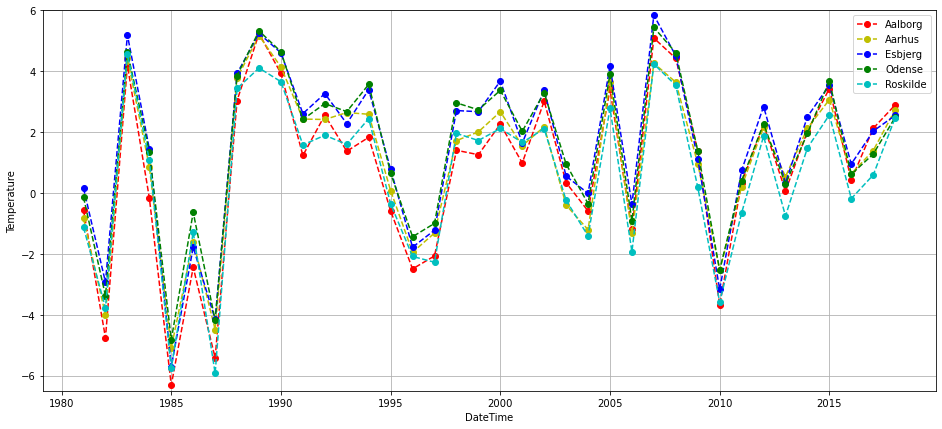

In [9]:
###########################
# Task: 
#   for each city, plot average temperature in January from 1980 to 2018.
#
###########################


### TO DO
df_temp = df_resampled.xs('Temp', level=1, axis=1) #先取出temperature列的数据
df_temp = df_temp.filter(like='-01-', axis=0) #再取出所有一月的数据
mean_temp = pd.DataFrame(index = list(range(1980, 2019)), columns = df_temp.columns) #建立dataframe存放每一年一月的平均数，即结果数据
for i in range(1980, 2019):
    df_temp_year = df_temp.filter(like=str(i), axis=0) #每次取出一年的一月数据
    for city in df_temp_year.columns.values:
        mean_temp.loc[i, city] = df_temp_year[city].mean() #计算该年一月的温度平均值，并放入结果表格中

print(mean_temp)

plt.figure(figsize=(16, 7))
color = ['r', 'y', 'b', 'g', 'c']
for i, city in enumerate(df_temp_year.columns.values):      
    plt.plot(mean_temp.loc[:, city], label=city, linestyle='--', marker='o', c=color[i]) #连续画五个城市的图，每个一种颜色

plt.xlabel('DateTime')
plt.ylabel('Temperature')

plt.ylim([-6.5, 6])
plt.grid()
plt.legend()
plt.show()

# df_temp.filter(regex='[0-9]*-01-[0-9]* [0-9]*:[0-9]*:[0-9]*').index

#########

        Aalborg     Aarhus    Esbjerg     Odense   Roskilde
1980        NaN        NaN        NaN        NaN        NaN
1981   8.437128    8.42164  11.110564  14.060199  11.493241
1982   5.186395   9.449626   6.957989  10.631555   9.041693
1983  10.639866  10.557918   9.000202  12.552312  13.074835
1984  11.777684   10.66888  12.830841  13.740737  12.725465
1985   8.409674   7.388456   7.370151  11.229703  10.794368
1986   8.115895   6.884905   9.272753  10.422681   9.069715
1987    7.98192   14.14531   6.674705  14.895508   10.53666
1988    9.27936   7.712405   5.820938   10.34122  10.314842
1989   7.482786   6.472918   6.632004   6.781956   6.930918
1990  13.063995  11.356789  11.966373  11.504172  11.968928
1991  14.026915  11.545261  10.780676  10.232179  10.161062
1992  18.012643  13.734245  12.923014   13.30687  11.543449
1993  17.785369  11.859258  13.885661  14.463132  13.715737
1994   8.885677   6.291974  10.299849   9.084351   8.151589
1995   7.145961   4.481531   8.817048   

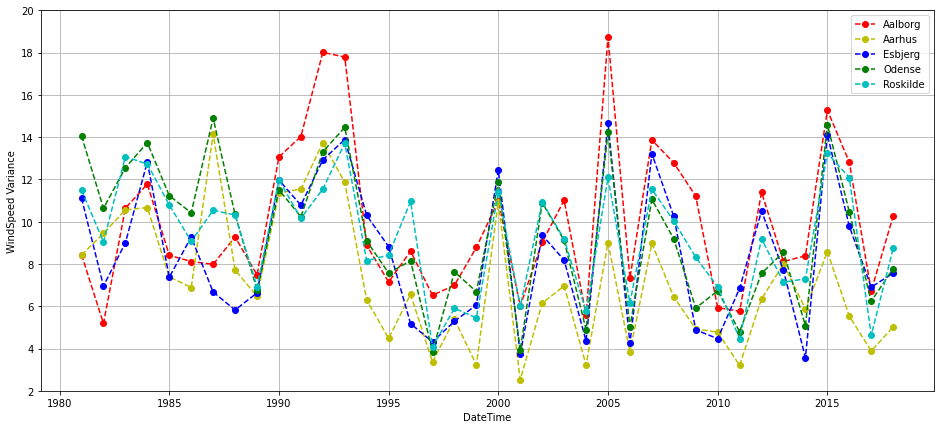

In [10]:
###########################
# Task: 
#   for each city, plot wind speed variance in January from 1980 to 2018.
#
###########################


### TO DO
df_wind = df_resampled.xs('WindSpeed', level=1, axis=1)
df_wind = df_wind.filter(like='-01-', axis=0)
var_wind = pd.DataFrame(index = list(range(1980, 2019)), columns = df_wind.columns)
for i in range(1980, 2019):
    df_wind_year = df_wind.filter(like=str(i), axis=0)
    for city in df_wind_year.columns.values:
        var_wind.loc[i, city] = df_wind_year[city].var()

print(var_wind)

plt.figure(figsize=(16, 7))
color = ['r', 'y', 'b', 'g', 'c']
for i, city in enumerate(df_wind_year.columns.values):      
    plt.plot(var_wind.loc[:, city], label=city, linestyle='--', marker='o', c=color[i])

plt.xlabel('DateTime')
plt.ylabel('WindSpeed Variance')

plt.ylim([2, 20])
plt.grid()
plt.legend()
plt.show()

#########

        Aalborg     Aarhus    Esbjerg     Odense   Roskilde
1980       24.0       24.0       25.0       25.0       22.0
1981       25.0       24.0       25.0  23.666667       23.0
1982       21.7       23.2       25.0       25.0       22.0
1983       16.0       18.0       18.0       18.0       18.0
1984       24.2       24.0       22.0  21.833333       21.0
1985       24.5       24.6       26.6       25.1  23.833333
1986  20.333333       21.0  22.833333  20.833333       21.0
1987  20.333333       23.0       21.0       20.4  19.833333
1988       24.8       24.2  25.833333       24.3       23.3
1989       26.5       24.0       25.0       26.1       24.5
1990       25.0       25.0  24.916667  24.916667       22.0
1991       21.7  22.666667  20.833333  22.833333       20.6
1992       25.0       25.0  25.833333       25.0       25.0
1993       25.0       25.0  25.833333  25.833333       24.0
1994       20.0       21.0       20.9       21.0       20.0
1995  20.777778       22.0  21.666667   

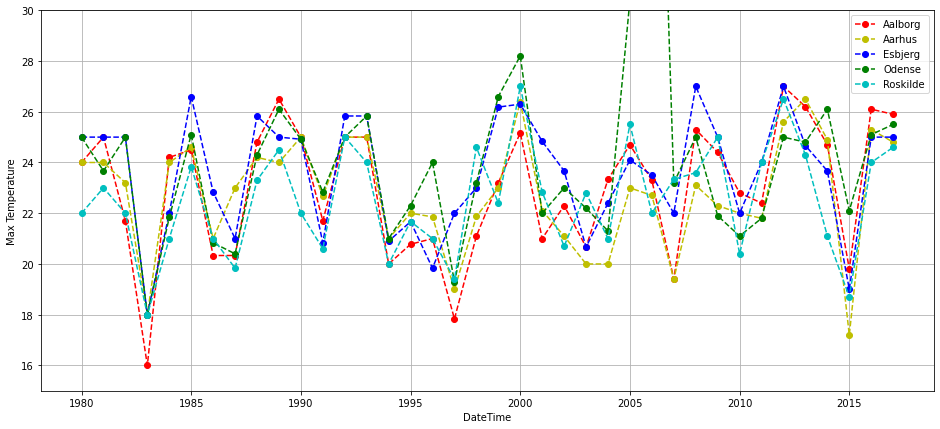

In [11]:
###########################
# Task: 
#   plot maximum temperature in May from 1980 to 2018.
#
###########################


## TO DO
df_max_temp = df_resampled.xs('Temp', level=1, axis=1)
df_max_temp = df_max_temp.filter(like='-05-', axis=0)
max_temp = pd.DataFrame(index = list(range(1980, 2019)), columns = df_max_temp.columns)
for i in range(1980, 2019):
    df_max_temp_year = df_max_temp.filter(like=str(i), axis=0)
    for city in df_max_temp_year.columns.values:
        max_temp.loc[i, city] = df_max_temp_year[city].max()

print(max_temp)

plt.figure(figsize=(16, 7))
color = ['r', 'y', 'b', 'g', 'c']
for i, city in enumerate(df_max_temp_year.columns.values):      
    plt.plot(max_temp.loc[:, city], label=city, linestyle='--', marker='o', c=color[i])

plt.xlabel('DateTime')
plt.ylabel('Max Temperature')

plt.ylim([15, 30])
plt.grid()
plt.legend()
plt.show()


#########

       Aalborg    Aarhus   Esbjerg    Odense  Roskilde
1980       0.5       0.0       0.0       0.0       0.0
1981       0.0       0.0       0.0       0.0       0.0
1982       0.0       0.0       0.0       0.0       0.0
1983       0.0       0.0       0.0       0.0       0.0
1984       0.0       0.0       0.0       0.0       0.0
1985       0.0       0.0       0.0       0.0       0.0
1986       0.0       0.0       0.0       0.0       0.0
1987       0.0       0.0       0.0       0.0       0.0
1988       0.0       0.0       0.0       0.0  0.140845
1989  0.333333       0.0       0.0       0.0       0.0
1990       0.0       0.0       0.0       0.0       0.0
1991       0.0       0.0  0.164286       0.5       0.0
1992       0.0       0.0       1.0  0.166667       0.0
1993       0.0       0.0  0.166667       0.0       0.0
1994       0.0       0.0       0.0       0.0       0.0
1995       0.0       0.0       0.0       0.0       0.0
1996       0.0       0.0  0.666667  0.571429       0.0
1997      

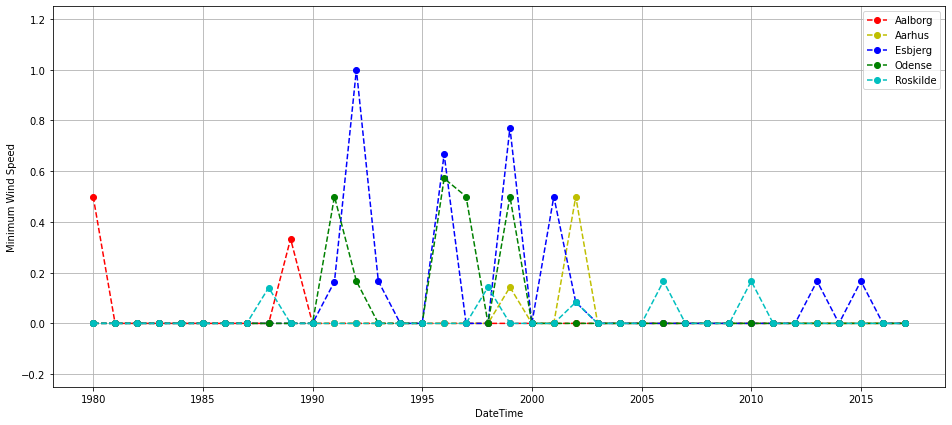

In [12]:
###########################
# Task: 
#   plot minimum wind speed in May from 1980 to 2018.
#
###########################


### TO DO
df_min_wind = df_resampled.xs('WindSpeed', level=1, axis=1)
df_min_wind = df_min_wind.filter(like='-05-', axis=0)
min_temp = pd.DataFrame(index = list(range(1980, 2019)), columns = df_min_wind.columns)
for i in range(1980, 2019):
    df_min_wind_year = df_min_wind.filter(like=str(i), axis=0)
    for city in df_min_wind_year.columns.values:
        min_temp.loc[i, city] = df_min_wind_year[city].min()

print(min_temp)

plt.figure(figsize=(16, 7))
color = ['r', 'y', 'b', 'g', 'c']
for i, city in enumerate(df_min_wind_year.columns.values):      
    plt.plot(min_temp.loc[:, city], label=city, linestyle='--', marker='o', c=color[i])

plt.xlabel('DateTime')
plt.ylabel('Minimum Wind Speed')

plt.ylim([-0.25, 1.25]) #风速不会小于零
plt.grid()
plt.legend()
plt.show()

#########

**NOTE:** Look at the scale of the previous plots. Do you think all those zeros actually mean that there was no wind at all?

## 1.4 - Outliers

In the plots you can notice there is definitely an outlier (you could also identify it using the general properties of the dataset as well). 

This is quite a common case one can encounter while dealing with big datasets. Such inconsistancyin the data is likely to affect our inference about the general statistics behind the data. **How to detect such outliers?**


### 1.4.1 Using visualisation tools

The very first method is to spot outliers by using your eyes. For example, open your data and find a
datapoint is clearly different from others. Let's look at different visualisation toos.


#### 1.4.1.1 Box Plot
Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”):

![](Figures/box_plot.png)

**median (Q2/50th Percentile)**: the middle value of the dataset.

**first quartile (Q1/25th Percentile)**: the middle number between the smallest number (not the “minimum”) and the median of the dataset.

**third quartile (Q3/75th Percentile)**: the middle value between the median and the highest value (not the “maximum”) of the dataset.

**interquartile range (IQR)**: 25th to the 75th percentile.

**“maximum”**: $Q3 + 1.5*IQR$

**“minimum”**: $Q1 -1.5*IQR$

**whiskers** (shown in blue)

**outliers** (shown as green circles)

Back to our max temperature example, let's box-plot and find out the outlier in the data we used to plot "The max temperature in May - city of Odense".

C:\ProgramData\Anaconda3\envs\DAPS\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


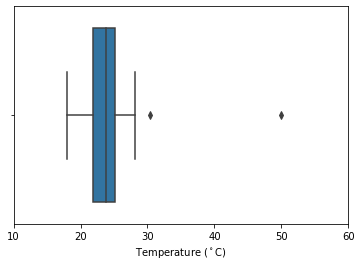

In [13]:
import seaborn as sns

# extract all the data except the last one because it is a NaN, which is missing value. 
# We will see shortly how to deal with missing value.

may_max_temp_3 = max_temp['Odense']
year = list(range(1980, 2019))
outlier_dataset = np.array(may_max_temp_3[:-1])
outlier_year = np.array(year[:-1])

# box plot
sns.boxplot(outlier_dataset)
plt.xlabel(r'Temperature ($^\circ$C)')
plt.xlim([10, 60])
plt.show()

As you can see, besides the outlier temperature 50 degrees, there is another outlier temperature around 31 degrees. Is it really an outlier? For 31 degres, it is ambiguous whether it is an outlier or variance.

#### 1.4.1.2 Scatter Plot
A scatter plot is the collection of points that shows values for two variables. 



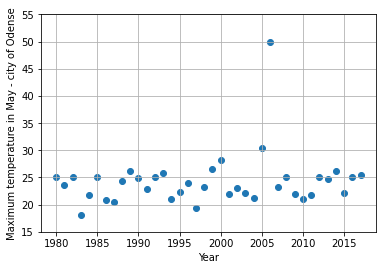

In [14]:
# scatter plot: x=year,y=value
plt.scatter(outlier_year,outlier_dataset)
plt.xlabel('Year')
plt.ylabel('Maximum temperature in May - city of Odense')
plt.ylim([15, 55])
plt.grid()
plt.show()

Observe how the data point around 50 degrees seems to clearly deviate from the general case.

### 1.4.2 Using statistics

Statistical methods can also be very useful to detec outliers. Let's look at some examples.

#### 1.4.2.1 Z-score
The Z-score is the signed number of standard deviations, calculated by following e

$$
z=\frac{x-\overline{x}}{S}
$$

where $\overline{x}$ is the mean value, $S$ is the standard deviation.

Let's see how it works in python.

z score of the dataset is:
 [1.42126640e-01 1.32898813e-01 1.42126640e-01 1.30175699e+00
 5.11058811e-01 1.62753549e-01 7.17327900e-01 8.06711173e-01
 2.26172248e-03 3.69022639e-01 1.24937550e-01 3.04789721e-01
 1.42126640e-01 3.14017549e-01 6.82949719e-01 4.14799902e-01
 6.41424494e-02 1.03360717e+00 2.29157721e-01 4.72157184e-01
 8.02187728e-01 4.76680629e-01 2.70411539e-01 4.35426811e-01
 6.21068992e-01 1.25597973e+00 5.27822698e+00 2.29157721e-01
 1.42126640e-01 4.97307538e-01 6.62322810e-01 5.17934447e-01
 1.42126640e-01 1.00872822e-01 3.69022639e-01 4.56053720e-01
 1.62753549e-01 2.45261185e-01]


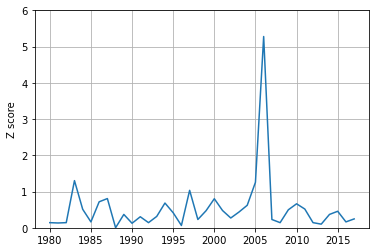

In [15]:
from scipy import stats
# calc the abs value of z-score
# z = np.abs(stats.zscore(outlier_dataset))
z = np.abs(stats.zscore(outlier_dataset.astype('float')))

print('z score of the dataset is:\r\n',z)

plt.plot(outlier_year,z)
plt.grid()
plt.ylim([0, 6])
plt.ylabel('Z score')
plt.show()


But, then what? how can we find outlier using these z-scores?

In general, we **put a threshold on z-scores**. Typically, the threshold is 3.
If $|z\_score|>3$, then it is an outlier.

In [16]:
# set a threshold and find the location where the value meets our condition(s)
threshold = 3
outlier_loc = np.where(z > threshold) #返回异常值的横坐标，是数组中的第几个

# find the outlier value given its index
outlier_by_Z_Score = outlier_dataset[outlier_loc]
print('the data classified as outlier by z score:\r\n', outlier_by_Z_Score)
print('the year of the outlier is:\r\n', outlier_year[outlier_loc])

the data classified as outlier by z score:
 [49.9]
the year of the outlier is:
 [2006]


#### 1.4.2.2   IQR score
Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data.

In [17]:
#np.quantile: Compute the q-th quantile of the data along the specified axis.
Q1 = np.quantile(outlier_dataset,0.25) 
Q3 = np.quantile(outlier_dataset,0.75)
IQR = Q3-Q1
Minimum = Q1-1.5*IQR
Maximum = Q3+1.5*IQR

# find values that meets the conditions: (outlier_dataset<Minimum) or (outlier_dataset>Maximum)
outlier_by_IQR_Score = outlier_dataset[(outlier_dataset<Minimum) | (outlier_dataset>Maximum)]
print('The data classified as outlier by IQR score:\r\n', outlier_by_IQR_Score)

The data classified as outlier by IQR score:
 [30.4 49.9]


## 1.4.3 What to do with outliers?

Now that we have ways to detecting outliers, what should we do with them? Let's go through a few potential solutions. 

### 1.4.3.1 Drop them
Simply drop the outliers as long as we have sufficient amount of data left.

Assume we have detected the outlier using z score. We can then drop it easily.

Before Drop, the dataset has shape:
 (38,)
After Drop, the dataset has shape:
 (37,)


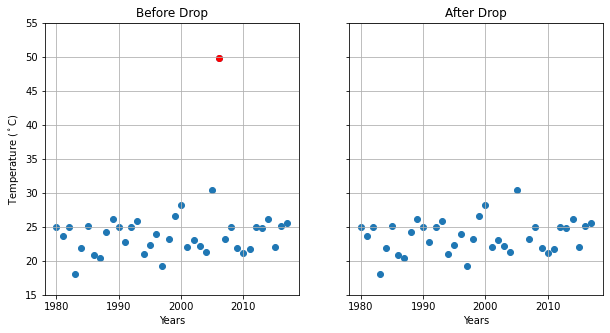

In [18]:
# find values that meet the conditions: outlier_dataset != outlier_by_Z_Score
# **NOTE** conditions like "array!=value" and  "array==value" only works 
# when value is a single value, not an array. The same mechanism for np.where(array==value).

dropped_outlier_dataset = outlier_dataset[outlier_dataset != outlier_by_Z_Score] #找出与经过zscore筛选后不相同的点

# do the same for year value
dropped_outlier_year = outlier_year[outlier_dataset != outlier_by_Z_Score]

print('Before Drop, the dataset has shape:\r\n', outlier_dataset.shape)
print('After Drop, the dataset has shape:\r\n', dropped_outlier_dataset.shape)

# plot and compare them
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
ax1.set_title('Before Drop')
ax1.scatter(outlier_year,outlier_dataset)
ax1.scatter(outlier_year[outlier_loc], outlier_dataset[outlier_loc], c='r')
ax1.set_ylim([15, 55])
ax1.set_xlabel('Years')
ax1.set_ylabel(r'Temperature ($^\circ$C)')
ax1.grid()

ax2.set_title('After Drop')
ax2.scatter(dropped_outlier_year,dropped_outlier_dataset)
ax2.set_xlabel('Years')
ax2.grid()

plt.show()

### 1.4.3.2 Cap your outliers.
Another way to handle true outliers is to cap them. 

Sometimes, the outlier appears as it hits the upper/lower bound of your sensor. What we can do is to replace it with a setting value, which, for example, could be the max/min value excluding those outliers or just some pre-fixed value.

Let's have a look how to do that in python.

Before cap the outlier, its value:
 [49.9]
After cap the outlier, its value:
 [30.4]


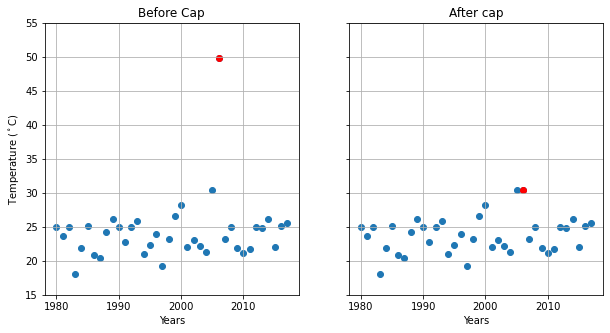

In [19]:
capped_outlier_dataset=np.copy(outlier_dataset)
print('Before cap the outlier, its value:\r\n',capped_outlier_dataset[outlier_loc])
# cap the outliers
capped_outlier_dataset[outlier_loc]=np.max(dropped_outlier_dataset) #将outlier转换为与最大值相同的值
print('After cap the outlier, its value:\r\n',capped_outlier_dataset[outlier_loc])

# plot and compare them
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
ax1.set_title('Before Cap')
ax1.scatter(outlier_year,outlier_dataset)
ax1.scatter(outlier_year[outlier_loc], outlier_dataset[outlier_loc], c='r')
ax1.set_ylim([15, 55])
ax1.set_xlabel('Years')
ax1.set_ylabel(r'Temperature ($^\circ$C)')
ax1.grid()

ax2.set_title('After cap')
ax2.scatter(outlier_year,capped_outlier_dataset)
ax2.scatter(outlier_year[outlier_loc], capped_outlier_dataset[outlier_loc], c='r')
ax2.set_xlabel('Years')
ax2.grid()

plt.show()

### 1.4.3.3 Replace it with a new value.
If an outlier seems to be due to a mistake in your data, you can try imputing another value. Common imputation methods include using the mean of a variable or utilizing a regression model to predict the missing value.

For example, we can replace it with the prediction value by a linear regression model.

Let's have a look how to do that in python.

Before replacing, the outlier value is:
 [49.9]
After replacing, the outlier value predicted by a regression model is: 
 [23.888354579254845]


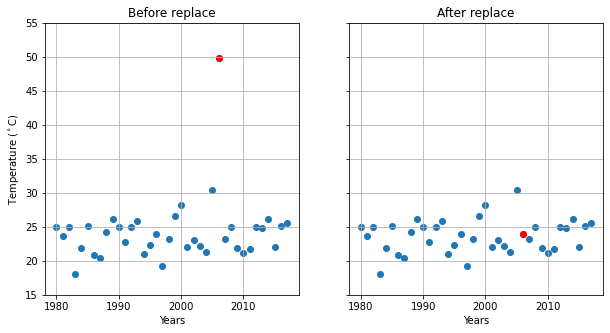

In [20]:
dropped_outlier_dataset = dropped_outlier_dataset.astype('float')
replaced_outlier_dataset = np.copy(outlier_dataset)
print('Before replacing, the outlier value is:\r\n',replaced_outlier_dataset[outlier_loc])

# find the coefficient of our linear model using clean data
z = np.polyfit(dropped_outlier_year,dropped_outlier_dataset, deg=1) # deg=1: use 1-order polynomial regression model
# define our linear model
pred_func = np.poly1d(z)
# predict the value of our outlier and replace it
pred_value = pred_func(outlier_year[outlier_loc])
replaced_outlier_dataset[outlier_loc]=pred_value
print('After replacing, the outlier value predicted by a regression model is: \r\n',replaced_outlier_dataset[outlier_loc])

# plot and compare them
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
ax1.set_title('Before replace')
ax1.scatter(outlier_year,outlier_dataset)
ax1.scatter(outlier_year[outlier_loc], outlier_dataset[outlier_loc], c='r')
ax1.set_ylim([15, 55])
ax1.set_xlabel('Years')
ax1.set_ylabel(r'Temperature ($^\circ$C)')
ax1.grid()

ax2.set_title('After replace')
ax2.scatter(outlier_year,replaced_outlier_dataset)
ax2.scatter(outlier_year[outlier_loc], pred_value, c='r')
ax2.set_xlabel('Years')
ax2.grid()

plt.show()

**_[TO DO]_** Congratulations!!! You have learned the techniques needed to detect and deal with outliers. Now, try to detect and deal with outliers in the same dataset showed above, but:

- use the IQR score to detect the outliers
- use the temperature data for the months in which the outliers are found to predict and replace them.
- use a higher order polynomial (2nd or 3rd) to fit the data.

**HINT:** 

1. Find the years that contain outliers, the IQR score might give you different results compared to the z-score
2. Are all the data points detected by the IQR score TRUE outliers?
3. Check the data of the months in which the outliers are found to see if there are more (i.e. the maximum value being an outlier does not necessarily mean it is the only one in that month!)
4. Use the "good" data to fit a 2nd or 3rd order polynomial and estimate the outliers.

In [21]:
outlier_loc_IQR = np.where((outlier_dataset<Minimum) | (outlier_dataset>Maximum))[0]
print('the year of the outlier detected by IQR score is:\r\n', outlier_year[outlier_loc_IQR])
df_outlier_IQR = df_resampled.xs((  'Odense',      'Temp') , axis=1)
df_outlier_IQR_0 = df_outlier_IQR.filter(like = str(outlier_year[outlier_loc_IQR][0]) + '-05-', axis=0)
df_outlier_IQR_1 = df_outlier_IQR.filter(like = str(outlier_year[outlier_loc_IQR][1]) + '-05-', axis=0)
df_outlier_IQR_all = pd.concat([df_outlier_IQR_0, df_outlier_IQR_1])
# df_outlier_IQR_all.columns = ['Odense-Temp']
df_outlier_IQR_all

the year of the outlier detected by IQR score is:
 [2005 2006]


DateTime
2005-05-01 00:00:00    10.0
2005-05-01 01:00:00     9.5
2005-05-01 02:00:00     8.6
2005-05-01 03:00:00     8.4
2005-05-01 04:00:00     8.5
                       ... 
2006-05-31 19:00:00    12.0
2006-05-31 20:00:00    11.0
2006-05-31 21:00:00    10.7
2006-05-31 22:00:00     9.2
2006-05-31 23:00:00     8.9
Name: (Odense, Temp), Length: 1488, dtype: float64

In [22]:
def IQR_score(outlier_dataset):
    Q1 = np.quantile(outlier_dataset,0.25) 
    Q3 = np.quantile(outlier_dataset,0.75)
    IQR = Q3-Q1
    Minimum = Q1-1.5*IQR
    Maximum = Q3+1.5*IQR
    return Minimum, Maximum

# find values that meets the conditions: (outlier_dataset<Minimum) or (outlier_dataset>Maximum)
min_0, max_0 = IQR_score(df_outlier_IQR_0)
min_1, max_1 = IQR_score(df_outlier_IQR_1)

outlier_by_IQR_Score_0 = df_outlier_IQR_0[(df_outlier_IQR_0<min_0) | (df_outlier_IQR_0>max_0)]
outlier_loc_IQR_0 = np.where((df_outlier_IQR_0<min_0) | (df_outlier_IQR_0>max_0))[0]
outlier_by_IQR_Score_1 = df_outlier_IQR_1[(df_outlier_IQR_1<min_1) | (df_outlier_IQR_1>max_1)]
outlier_loc_IQR_1 = np.where((df_outlier_IQR_1<min_1) | (df_outlier_IQR_1>max_1))[0]

print('the outliers detected by IQR score in May 2005 are:\r\n', outlier_by_IQR_Score_0)
print('the outliers position detected by IQR score in May 2005 are:\r\n', outlier_loc_IQR_0)
print('the outliers detected by IQR score in May 2006 are:\r\n', outlier_by_IQR_Score_1)
print('the outliers position detected by IQR score in May 2006 are:\r\n', outlier_loc_IQR_1)

the outliers detected by IQR score in May 2005 are:
 DateTime
2005-05-26 09:00:00    24.100000
2005-05-26 11:00:00    23.700000
2005-05-26 12:00:00    24.400000
2005-05-26 13:00:00    24.600000
2005-05-26 14:00:00    25.800000
2005-05-26 15:00:00    26.000000
2005-05-26 16:00:00    25.100000
2005-05-26 17:00:00    23.900000
2005-05-28 09:00:00    24.000000
2005-05-28 10:00:00    25.900000
2005-05-28 11:00:00    27.600000
2005-05-28 12:00:00    28.166667
2005-05-28 13:00:00    29.200000
2005-05-28 14:00:00    30.400000
2005-05-28 15:00:00    28.385714
2005-05-28 16:00:00    24.700000
Name: (Odense, Temp), dtype: float64
the outliers position detected by IQR score in May 2005 are:
 [609 611 612 613 614 615 616 617 657 658 659 660 661 662 663 664]
the outliers detected by IQR score in May 2006 are:
 DateTime
2006-05-04 11:00:00    20.000000
2006-05-04 12:00:00    20.200000
2006-05-05 13:00:00    20.300000
2006-05-05 14:00:00    21.000000
2006-05-05 15:00:00    20.500000
2006-05-07 13:00:0

In [23]:
'''
# Predict and replace the outliers of temperature data in May 2005 & 2006, 
# but failed to fit the polynomial function using datatime indexes.

def draw_comparison(outlier_dataset, outlier_index, outlier_by_IQR_Score, outlier_loc_IQR):
    dropped_outlier_dataset = outlier_dataset[outlier_dataset != outlier_by_IQR_Score][0]
    dropped_outlier_index = outlier_index[outlier_dataset != outlier_by_IQR_Score][0]

    dropped_outlier_dataset = dropped_outlier_dataset.astype('float')
    dropped_outlier_index = dropped_outlier_index.astype('float')
    replaced_outlier_dataset = np.copy(outlier_dataset)
    print('Before replacing, the outlier value is:\r\n', replaced_outlier_dataset[outlier_loc_IQR])

    # find the coefficient of our linear model using clean data
    z = np.polyfit(dropped_outlier_index, dropped_outlier_dataset, deg=2) # deg=1: use 1-order polynomial regression model
    # define our linear model
    pred_func = np.poly1d(z)
    # predict the value of our outlier and replace it
    pred_value = pred_func(outlier_index[outlier_loc_IQR])
    replaced_outlier_dataset[outlier_loc_IQR]=pred_value
    print('After replacing, the outlier value predicted by a regression model is: \r\n',replaced_outlier_dataset[outlier_loc_IQR])

    # plot and compare them
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
    ax1.set_title('Before replace')
    ax1.scatter(outlier_index,outlier_dataset)
    ax1.scatter(outlier_index[outlier_loc_IQR], outlier_dataset[outlier_loc_IQR], c='r')
    ax1.set_ylim([15, 55])
    ax1.set_xlabel('Dates')
    ax1.set_ylabel(r'Temperature ($^\circ$C)')
    ax1.grid()

    ax2.set_title('After replace')
    ax2.scatter(outlier_index,replaced_outlier_dataset)
    ax2.scatter(outlier_index[outlier_loc_IQR], pred_value, c='r')
    ax2.set_xlabel('Dates')
    ax2.grid()

    plt.show()

draw_comparison(df_outlier_IQR_0.values, df_outlier_IQR_0.index, outlier_by_IQR_Score_0.values, outlier_loc_IQR_0)
draw_comparison(df_outlier_IQR_1.values, df_outlier_IQR_1.index, outlier_by_IQR_Score_1.values, outlier_loc_IQR_1)
'''

"\n# Predict and replace the outliers of temperature data in May 2005 & 2006, \n# but failed to fit the polynomial function using datatime indexes.\n\ndef draw_comparison(outlier_dataset, outlier_index, outlier_by_IQR_Score, outlier_loc_IQR):\n    dropped_outlier_dataset = outlier_dataset[outlier_dataset != outlier_by_IQR_Score][0]\n    dropped_outlier_index = outlier_index[outlier_dataset != outlier_by_IQR_Score][0]\n\n    dropped_outlier_dataset = dropped_outlier_dataset.astype('float')\n    dropped_outlier_index = dropped_outlier_index.astype('float')\n    replaced_outlier_dataset = np.copy(outlier_dataset)\n    print('Before replacing, the outlier value is:\r\n', replaced_outlier_dataset[outlier_loc_IQR])\n\n    # find the coefficient of our linear model using clean data\n    z = np.polyfit(dropped_outlier_index, dropped_outlier_dataset, deg=2) # deg=1: use 1-order polynomial regression model\n    # define our linear model\n    pred_func = np.poly1d(z)\n    # predict the value of o

C:\ProgramData\Anaconda3\envs\DAPS\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  import sys
C:\ProgramData\Anaconda3\envs\DAPS\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


Before replacing, the outlier value is:
 [30.4 49.9]
After replacing, the outlier value predicted by a regression model is: 
 [25.08063063062764 25.110649718542845]


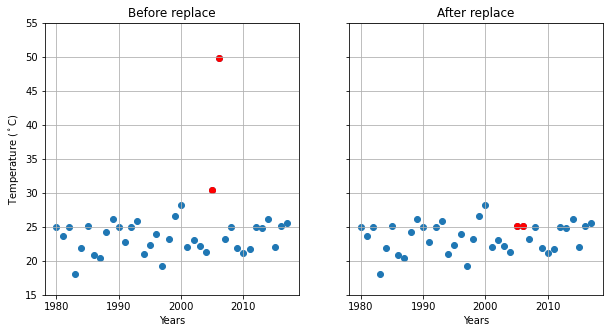

In [34]:
##########
# - use the IQR score to detect the outliers
# - use the temperature data for the months in which the outliers are found to predict and replace them.
# - use a higher order polynomial (2nd or 3rd) to fit the data.

# TO BE COMPLETED 
dropped_outlier_dataset = outlier_dataset[outlier_dataset != outlier_by_IQR_Score][0]
dropped_outlier_year = outlier_year[outlier_dataset != outlier_by_IQR_Score][0]

dropped_outlier_dataset = dropped_outlier_dataset.astype('float')
replaced_outlier_dataset = np.copy(outlier_dataset)
print('Before replacing, the outlier value is:\r\n',replaced_outlier_dataset[outlier_loc_IQR])

# find the coefficient of our linear model using clean data
z = np.polyfit(dropped_outlier_year, dropped_outlier_dataset, deg=2) # deg=1: use 1-order polynomial regression model
# define our linear model
pred_func = np.poly1d(z)
# predict the value of our outlier and replace it
pred_value = pred_func(outlier_year[outlier_loc_IQR])
replaced_outlier_dataset[outlier_loc_IQR]=pred_value
print('After replacing, the outlier value predicted by a regression model is: \r\n',replaced_outlier_dataset[outlier_loc_IQR])

# plot and compare them
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
ax1.set_title('Before replace')
ax1.scatter(outlier_year,outlier_dataset)
ax1.scatter(outlier_year[outlier_loc_IQR], outlier_dataset[outlier_loc_IQR], c='r')
ax1.set_ylim([15, 55])
ax1.set_xlabel('Years')
ax1.set_ylabel(r'Temperature ($^\circ$C)')
ax1.grid()

ax2.set_title('After replace')
ax2.scatter(outlier_year,replaced_outlier_dataset)
ax2.scatter(outlier_year[outlier_loc_IQR], pred_value, c='r')
ax2.set_xlabel('Years')
ax2.grid()

plt.show()

##########################################################

## 1.5 Missing data

Resampling a dataset does not assure that no missing values will be found afterwards, because the interpolation method incurs in problems when many consecutive NaNs are encountered. In this case, you can see that there are some NaNs in the cities of Esbjerg and Roskilde, but what about the other cities? (remember we were only looking at the head of the dataset, but it actually has more than 330000 rows!)

**_[TO DO]_** count the number of missing values in each column of the dataset.

In [25]:
# task
#     count the number of missing values in each column of the dataset.

# TO DO
df_resampled.isnull().sum(axis=0)
##############################

Aalborg   Temp            0
          Pressure        0
          WindSpeed       0
          WindDir         0
Aarhus    Temp            0
          Pressure        0
          WindSpeed       0
          WindDir         0
Esbjerg   Temp            1
          Pressure     1040
          WindSpeed       1
          WindDir         1
Odense    Temp            0
          Pressure        0
          WindSpeed       0
          WindDir         0
Roskilde  Temp            1
          Pressure      764
          WindSpeed       1
          WindDir         1
dtype: int64

You can clearly see that the number of missing values is less than 0.5% and only for the pressure in Esbjerg and Roskilde. This does not affect the dataset as a whole, but since it is a time series, it can affect statistics on a yearly (or seasonal) time basis. 

Moreover, a second consideration about the linear interpolation in the resampling step is that the filling process might be deceiving.

**_[TO DO]_** As an example, plot only the signals that in the previous question contained a significant amount of missing values. Can you spot where the linear interpolation does not provide a reliable outcome?

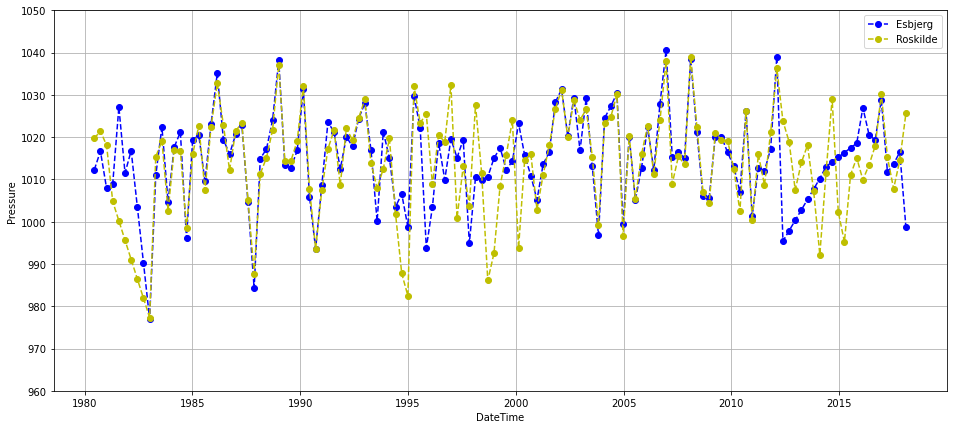

In [33]:
# TO DO
city_1 = df_resampled.xs((  'Esbjerg',      'Pressure') , axis=1)
city_2 = df_resampled.xs((  'Roskilde',      'Pressure') , axis=1)

plt.figure(figsize=(16, 7))
plt.plot(city_1[::2500], label='Esbjerg', linestyle='--', marker='o',  c='b')
plt.plot(city_2[::2500], label='Roskilde', linestyle='--', marker='o',  c='y')

plt.xlabel('DateTime')
plt.ylabel('Pressure')

plt.ylim([960, 1050])
plt.grid()
plt.legend()
plt.show()

########################################

**_[TO DO]_** For just one of the two signals, produce a plot of the atmospheric pressure versus time and an histogram distribution for two different years:
- one with mostly "reliable" measurements
- one with an excessive amount of linearly interpolated values

Which differences can you see in those plots?

**HINT:** The typical value of the atmospheric pressure is around 1013 mbar and it has small variance. Therefore the distribution should be a Gaussian.

DateTime
1982-11-06 23:00:00    979.998955
1982-11-07 00:00:00    979.997123
1982-11-07 01:00:00    979.995292
1982-11-07 02:00:00    979.993460
1982-11-07 03:00:00    979.991628
                          ...    
2018-01-03 14:00:00    977.700000
2018-01-03 15:00:00    978.300000
2018-01-03 16:00:00    978.900000
2018-01-03 17:00:00    979.400000
2018-01-03 18:00:00    979.700000
Name: (Roskilde, Pressure), Length: 3234, dtype: float64


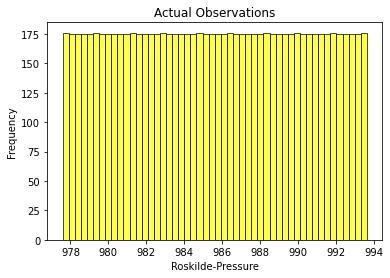

In [27]:
# [TO DO (1)] choose one year with many interpolated values, plot it and make an histogram of the distribution

# TO BE COMPLETED
from collections import Counter
df_pressure = df_resampled.xs((  'Roskilde',      'Pressure') , axis=1)

df_interpolated = df_pressure[(df_pressure > 950) & (df_pressure < 980)]
print(df_interpolated)
actual_year = [x.year for x in df_interpolated.index]

year_counts = Counter(actual_year)
top_year = year_counts.most_common(1)[0][0]

# top_year_index = [x.year == top_year for x in df_actual.index]
df_top_year = df_pressure[df_pressure.index.year == top_year]
df_top_year

plt.hist(df_top_year, bins=50, facecolor="yellow", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("Roskilde-Pressure")
# 显示纵轴标签
plt.ylabel("Frequency")
# 显示图标题
plt.title("Actual Observations")
plt.show()

###############################################

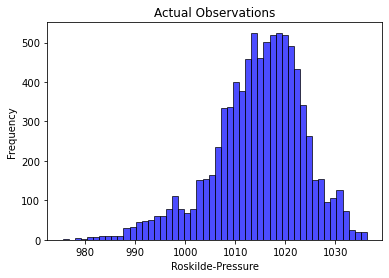

In [28]:
# [TO DO (2)] choose one year with mostly actual observations, plot it and make an histogram of the distribution

# TO BE COMPLETED

df_actual = df_pressure[(df_pressure > 1012.999) & (df_pressure < 1013.001)]
actual_year = [x.year for x in df_actual.index]

year_counts = Counter(actual_year)
top_year = year_counts.most_common(1)[0][0]

# top_year_index = [x.year == top_year for x in df_actual.index]
df_top_year = df_pressure[df_pressure.index.year == top_year]
df_top_year

plt.hist(df_top_year, bins=50, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("Roskilde-Pressure")
# 显示纵轴标签
plt.ylabel("Frequency")
# 显示图标题
plt.title("Actual Observations")
plt.show()


### 1.5.1 Imputation of missing data points

Dealing with missing data points (or badly interpolated ones) is not easy. When missing data points are found, there are various approaches that we can consider:

- drop all of them (in this case is quite reasonable as they are only a few, percentage-wise).
- replace with the mean, median or mode. 
- replace with a fixed number, like -1 or 0.

Since we are dealing with a time series, none of these methods seems to be appropriate, especially the replacement. 
Therefore, we could generate this data by creating a predictive model that estimates the missing data from all the other input signals. Then we could fill the gaps by putting these generated values back into the data-set.

This process is also referred to as **imputation**. There are many ways to impute the missing values, one of the most powerful being the *MissForest* module inside the [missingpy](https://pypi.org/project/missingpy/) package (this package is not installed in the base Anaconda environment).

It basically fits a Random Forest (shallow machine learning algorithm) to the data and estimates all the missing values in each column feature. Here we only provide the code to run the MissForest algorithm (which is quite slow on Jupyter!).


As an example, we have pre-trained the MissForest in order to predict the pressure values in Roskilde in 1982 (all the data points are linearly interpolated).

You can see that the imputation consistently replicates how the pressure varies through the year, with a higher variance in winter and a lower one in summer. 

Feel free to install the *missingpy* package (you need to use pip, is not in the Anaconda repository) and try to replace the missing values and the badly interpolated ones.

In [29]:
# from missingpy import MissForest
# imputer = MissForest()
from missingpy import KNNImputer
imputer = KNNImputer()
X = df_resampled['Esbjerg'].loc['1980-03-01 10:00:00':'1995-12-31 23:00:00','Pressure']
# print(X.index)
X_input = X.values.reshape(-1, 1)
X_imputed = imputer.fit_transform(X_input)
X_df = pd.DataFrame(X_imputed, index = X.index, columns = ['Pressure'])

X_df.to_pickle('./weather-data/weather_Esbjerg_imputed.pkl')


C:\ProgramData\Anaconda3\envs\DAPS\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\ProgramData\Anaconda3\envs\DAPS\lib\site-packages\missingpy\knnimpute.py:224: UserWarning: There are rows with more than 50.0% missing values. These rows are not included as donor neighbors.
  .format(self.row_max_missing * 100))
C:\ProgramData\Anaconda3\envs\DAPS\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
C:\ProgramData\Anaconda3\envs\DAPS\lib\site-packages\missingpy\knnimpute.py:282: UserWa

In [30]:
df_Esbjerg_imputed = pd.read_pickle('./weather-data/weather_Esbjerg_imputed.pkl')
df_Esbjerg_imputed

,Pressure
DateTime,
1980-03-01 10:00:00,1012.864944
1980-03-01 11:00:00,1012.864944
1980-03-01 12:00:00,1012.864944
1980-03-01 13:00:00,1012.864944
1980-03-01 14:00:00,1012.864944
...,...
1995-12-31 19:00:00,1010.018897
1995-12-31 20:00:00,1010.018075
1995-12-31 21:00:00,1010.017254


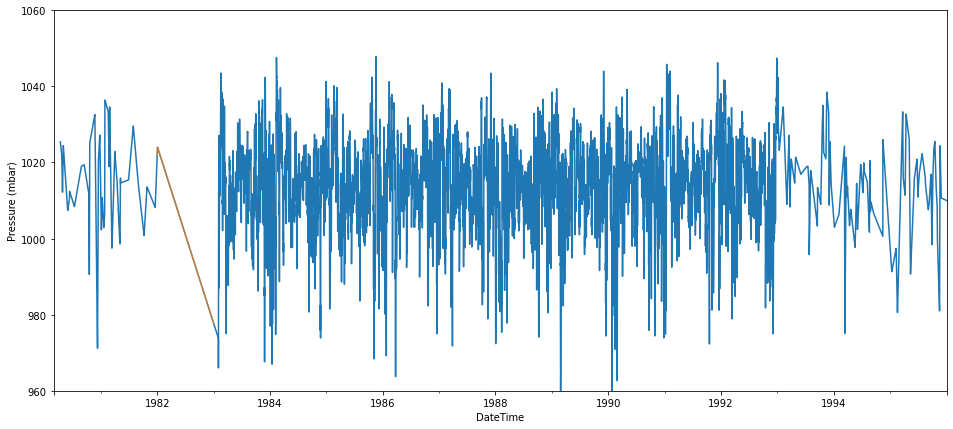

In [31]:
plt.figure(figsize=(16, 7))
df_resampled['Esbjerg'].loc['1980-03-01 10:00:00':'1995-12-31 23:00:00','Pressure'].plot()
df_Esbjerg_imputed.loc['1982-01-01 00:00:00':'1982-12-31 23:00:00','Pressure'].plot(alpha=0.7)

plt.ylim([960, 1060])
plt.ylabel('Pressure (mbar)')
plt.show()